
### Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt 

In [2]:
tf.__version__

'2.5.0'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Importing Dataset**

In [147]:
dataset = pd.read_excel('/content/drive/MyDrive/DE3500_MTP/Features_2500RPM_60dB.xlsx')

# Use Different y values for different Problem Formulations

In [148]:
X = dataset.iloc[:, :-14].values
y_14 = dataset.iloc[:,-1].values
y_4 = dataset.iloc[:,-2].values

In [149]:
y_OHE = y_14
y_OHE_4 = y_4

In [150]:
print(X.shape)
print(y_14.shape)

(3500, 85)
(3500,)


In [151]:
print(pd.unique(y_4))

['Normal' 'Pressure Reduction In Intake Manifold'
 'Compression Ratio Reduction in Cylinders'
 'Reduction in Amount of Fuel Injected into Cylinders']


### One-Hot Encoding Output Variable

In [152]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
y_OHE = pd.get_dummies(y_OHE)
onehot = encoder.fit_transform(y_OHE)
print(onehot)

[[1. 0. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 0. 1. 0.]
 ...
 [1. 0. 1. ... 0. 0. 1.]
 [1. 0. 1. ... 0. 0. 1.]
 [1. 0. 1. ... 0. 0. 1.]]


In [153]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
y_OHE_4 = pd.get_dummies(y_OHE_4)
onehot = encoder.fit_transform(y_OHE_4)
print(onehot)

[[1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 ...
 [1. 0. 1. ... 0. 0. 1.]
 [1. 0. 1. ... 0. 0. 1.]
 [1. 0. 1. ... 0. 0. 1.]]


### Splitting Dataset into Train & Test

In [154]:
from sklearn.model_selection import train_test_split
X_OHE_train, X_OHE_test, y_OHE_train, y_OHE_test = train_test_split(X, y_OHE, test_size = 0.2, random_state = 0)  

In [155]:
from sklearn.model_selection import train_test_split
X_OHE_4_train, X_OHE_4_test, y_OHE_4_train, y_OHE_4_test = train_test_split(X, y_OHE_4, test_size = 0.2, random_state = 0)  

### Feature Scaling

In [156]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_OHE_train = sc.fit_transform(X_OHE_train)
X_OHE_test = sc.transform(X_OHE_test)


In [157]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_OHE_4_train = sc.fit_transform(X_OHE_4_train)
X_OHE_4_test = sc.transform(X_OHE_4_test)


## ANN For 14 - Class Problem

In [158]:
ann_OHE = tf.keras.models.Sequential()

In [159]:
ann_OHE.add(tf.keras.layers.Dense(units = 84, activation = 'relu'))

In [1]:
ann_OHE.add(tf.keras.layers.Dense(units = 14, activation = 'softmax'))

NameError: name 'ann_OHE' is not defined

In [2]:
ann_OHE.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

NameError: name 'ann_OHE' is not defined

In [162]:
ann = ann_OHE.fit(X_OHE_train, y_OHE_train, validation_data=(X_OHE_test,y_OHE_test), batch_size = 32, epochs = 20)

Epoch 1/20
88/88 [==============================] - 1s 4ms/step - loss: 1.1567 - accuracy: 0.7789 - val_loss: 0.5218 - val_accuracy: 0.8843
Epoch 2/20
88/88 [==============================] - 0s 2ms/step - loss: 0.4230 - accuracy: 0.9093 - val_loss: 0.3255 - val_accuracy: 0.9343
Epoch 3/20
88/88 [==============================] - 0s 2ms/step - loss: 0.3027 - accuracy: 0.9239 - val_loss: 0.2498 - val_accuracy: 0.9500
Epoch 4/20
88/88 [==============================] - 0s 2ms/step - loss: 0.2440 - accuracy: 0.9339 - val_loss: 0.2110 - val_accuracy: 0.9514
Epoch 5/20
88/88 [==============================] - 0s 2ms/step - loss: 0.2132 - accuracy: 0.9432 - val_loss: 0.1756 - val_accuracy: 0.9571
Epoch 6/20
88/88 [==============================] - 0s 2ms/step - loss: 0.1854 - accuracy: 0.9489 - val_loss: 0.1478 - val_accuracy: 0.9643
Epoch 7/20
88/88 [==============================] - 0s 2ms/step - loss: 0.1662 - accuracy: 0.9564 - val_loss: 0.1321 - val_accuracy: 0.9629
Epoch 8/20
88/88 [==

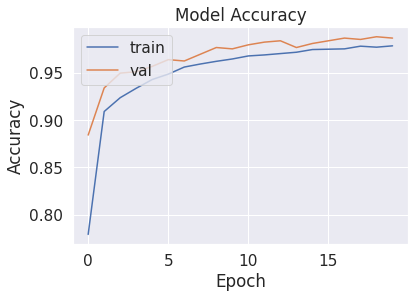

In [163]:
plt.plot(ann.history['accuracy'])
plt.plot(ann.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

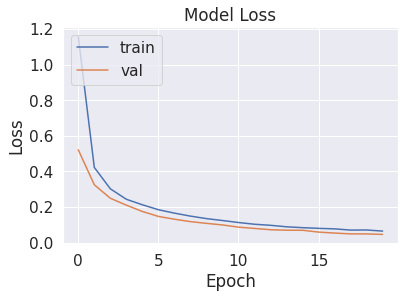

In [164]:
plt.plot(ann.history['loss'])
plt.plot(ann.history['val_loss'])

plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model Loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [165]:
y_pred_14 = ann_OHE.predict(X_OHE_test)

In [166]:
y_pred_14 = (y_pred_14>0.5)
y_pred_14 = 1*y_pred_14
y_pred_14

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [167]:
class_labels = list(y_OHE_test)
y_OHE_test = y_OHE_test.to_numpy()
type(y_OHE_test)

numpy.ndarray

In [168]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_OHE_test.argmax(axis=1), y_pred_14.argmax(axis=1))

In [169]:
cm

array([[65,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 46,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 42,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 50,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 39,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 49,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 50,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0, 52,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  3,  0, 47,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0, 39,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 59,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 58,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 43,  0],
       [ 2,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0, 51]])

In [170]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import sklearn.metrics

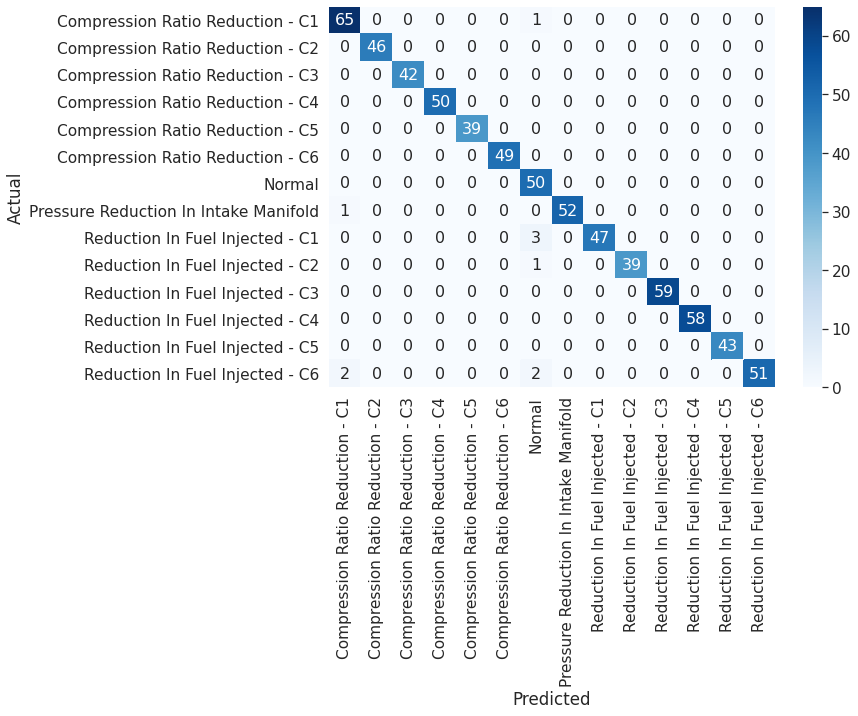

In [171]:
df_cm = pd.DataFrame(cm, columns=class_labels, index = class_labels)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [172]:
from sklearn.metrics import classification_report
print(classification_report(y_OHE_test.argmax(axis=1), y_pred_14.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        66
           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00        42
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        39
           5       1.00      1.00      1.00        49
           6       0.88      1.00      0.93        50
           7       1.00      0.98      0.99        53
           8       1.00      0.94      0.97        50
           9       1.00      0.97      0.99        40
          10       1.00      1.00      1.00        59
          11       1.00      1.00      1.00        58
          12       1.00      1.00      1.00        43
          13       1.00      0.93      0.96        55

    accuracy                           0.99       700
   macro avg       0.99      0.99      0.99       700
weighted avg       0.99      0.99      0.99       700



## Running ANN For 4-Class Problem

In [173]:
ann_OHE_4 = tf.keras.models.Sequential()
ann_OHE_4.add(tf.keras.layers.Dense(units = 84, activation = 'relu'))
ann_OHE_4.add(tf.keras.layers.Dense(units = 4, activation = 'softmax'))
ann_OHE_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [174]:
ann2 = ann_OHE_4.fit(X_OHE_4_train, y_OHE_4_train, validation_data=(X_OHE_4_test,y_OHE_4_test), batch_size = 32, epochs = 20)

Epoch 1/20
88/88 [==============================] - 1s 4ms/step - loss: 0.5124 - accuracy: 0.8064 - val_loss: 0.2551 - val_accuracy: 0.9043
Epoch 2/20
88/88 [==============================] - 0s 2ms/step - loss: 0.2228 - accuracy: 0.9125 - val_loss: 0.1840 - val_accuracy: 0.9114
Epoch 3/20
88/88 [==============================] - 0s 2ms/step - loss: 0.1755 - accuracy: 0.9364 - val_loss: 0.1480 - val_accuracy: 0.9829
Epoch 4/20
88/88 [==============================] - 0s 2ms/step - loss: 0.1512 - accuracy: 0.9493 - val_loss: 0.1272 - val_accuracy: 0.9800
Epoch 5/20
88/88 [==============================] - 0s 2ms/step - loss: 0.1291 - accuracy: 0.9646 - val_loss: 0.1094 - val_accuracy: 0.9757
Epoch 6/20
88/88 [==============================] - 0s 2ms/step - loss: 0.1169 - accuracy: 0.9675 - val_loss: 0.0959 - val_accuracy: 0.9800
Epoch 7/20
88/88 [==============================] - 0s 2ms/step - loss: 0.1045 - accuracy: 0.9686 - val_loss: 0.0906 - val_accuracy: 0.9900
Epoch 8/20
88/88 [==

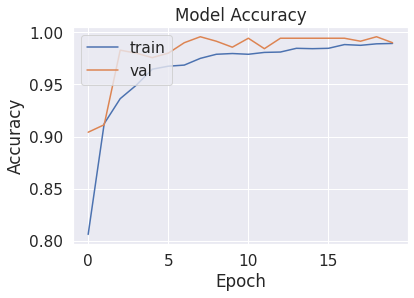

In [175]:
plt.plot(ann2.history['accuracy'])
plt.plot(ann2.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

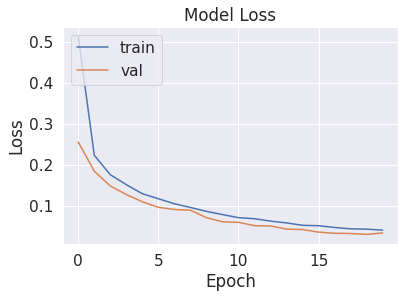

In [176]:
plt.plot(ann2.history['loss'])
plt.plot(ann2.history['val_loss'])

plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model Loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [177]:
class_labels = list(y_OHE_4_test)

In [178]:
y_pred_4 = ann_OHE_4.predict(X_OHE_4_test)

In [179]:
y_pred_4 = (y_pred_4>0.5)
y_pred_4 = 1*y_pred_4
type(y_pred_4)

numpy.ndarray

In [180]:
y_OHE_4_test = y_OHE_4_test.to_numpy()
type(y_OHE_4_test)

numpy.ndarray

In [181]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_OHE_4_test.argmax(axis=1), y_pred_4.argmax(axis=1))

In [182]:
cm

array([[291,   1,   0,   0],
       [  0,  50,   0,   0],
       [  0,   0,  53,   0],
       [  0,   5,   0, 300]])

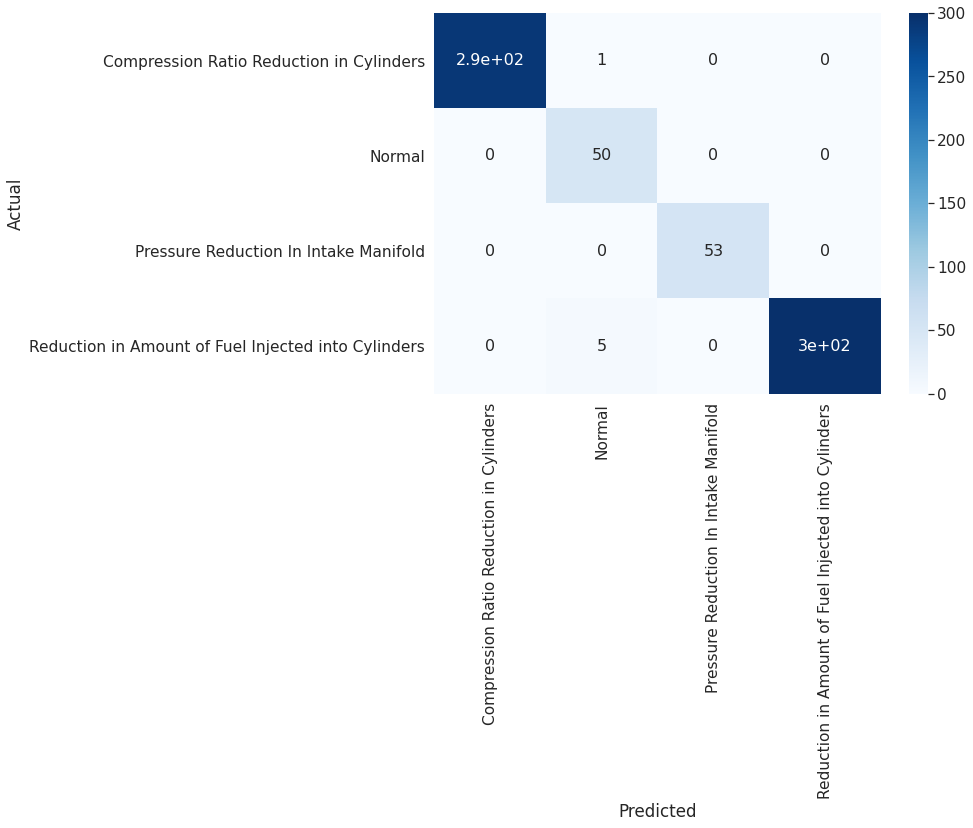

In [183]:
df_cm = pd.DataFrame(cm, columns=class_labels, index = class_labels)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [184]:
from sklearn.metrics import classification_report
print(classification_report(y_OHE_4_test.argmax(axis=1), y_pred_4.argmax(axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       292
           1       0.89      1.00      0.94        50
           2       1.00      1.00      1.00        53
           3       1.00      0.98      0.99       305

    accuracy                           0.99       700
   macro avg       0.97      1.00      0.98       700
weighted avg       0.99      0.99      0.99       700



## **5-Fold Cross Validation - 14 Class**


## **14 Classes**
1. Normal
2. Pressure Reduction in Intake Manifold
3. Compression Ratio Reduction - C1
4. Compression Ratio Reduction - C2
5. Compression Ratio Reduction - C3
6. Compression Ratio Reduction - C4
7. Compression Ratio Reduction - C5
8. Compression Ratio Reduction - C6
9. Reduction In Fuel Injected - C1
10. Reduction In Fuel Injected - C2
11. Reduction In Fuel Injected - C3
12. Reduction In Fuel Injected - C4
13. Reduction In Fuel Injected - C5
14. Reduction In Fuel Injected - C6


In [185]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

def build_classifier():
	classifier = Sequential()
	
	classifier.add(Dense(
		units = 84,
		activation="relu"
		))
	
	classifier.add(Dense(
		units = 14,
		activation="softmax"
		))
	
	
	classifier.compile(
		optimizer = "adam",
		loss="categorical_crossentropy",
		metrics=['accuracy']
		)
	
	return classifier

#this classifier will be use to the 10 different training fold 
#for k-cross validation on 1 test fold
classifier = KerasClassifier(build_fn = build_classifier,
							 batch_size = 16,
							 nb_epoch = 20)

accuracies = cross_val_score(
		estimator=classifier,
		X = X_OHE_train,
		y = y_OHE_train,
		cv=5
		)
#the important variable is cv which mean the number of
#fold in cross validation that we will use

#after we got the accuracies, find the mean
mean = accuracies.mean()
variance = accuracies.std()

35/35 [==============================] - 0s 1ms/step - loss: 0.4279 - accuracy: 0.9125


In [186]:
mean 

0.9017857193946839

In [187]:
variance

0.021635905019272608

In [188]:
std = np.sqrt(variance)
std

0.14709148520316398

## 5 Fold CV - 4 Class Problem

### 4 - Classes :
1. Normal 
2. Pressure Reduction in Intake Manifold
3. Compression Ratio Reduction 
4. Pressure Ratio Reduction

In [189]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

def build_classifier():
	classifier = Sequential()
	
	classifier.add(Dense(
		units = 84,
		activation="relu"
		))
	
	classifier.add(Dense(
		units = 4,
		activation="softmax"
		))
	
	
	classifier.compile(
		optimizer = "adam",
		loss="categorical_crossentropy",
		metrics=['accuracy']
		)
	
	return classifier

#this classifier will be use to the 10 different training fold 
#for k-cross validation on 1 test fold
classifier = KerasClassifier(build_fn = build_classifier,
							 batch_size = 32,
							 nb_epoch = 20)

accuracies = cross_val_score(
		estimator=classifier,
		X = X_OHE_4_train,
		y = y_OHE_4_train,
		cv=5
		)
#the important variable is cv which mean the number of
#fold in cross validation that we will use

#after we got the accuracies, find the mean
mean = accuracies.mean()
variance = accuracies.std()

18/18 [==============================] - 0s 1ms/step - loss: 0.2851 - accuracy: 0.9000


In [190]:
mean

0.8921428442001342

In [191]:
variance

0.014356962241481329

In [192]:
std = np.sqrt(variance)
std

0.11982054181767553